In order to further improve our model, it is time to add even more data to our model! 

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from   sklearn.linear_model import LinearRegression
from   sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px

# warnings.filterwarnings('ignore')

In [2]:
avg_income = pd.read_excel("..\\data\\washington_state_income_by_zipcode.xlsx", usecols = ["Zip Code", "Location", "City", "Population", "Avg. Income/H/hold", "National Rank"])
avg_income.drop(index = [100, 201, 302, 403, 504], inplace = True)

In [3]:
avg_income.rename(columns = {'Zip Code': 'zipcode'}, inplace = True)

In [4]:
avg_income

,zipcode,Location,City,Population,Avg. Income/H/hold,National Rank
0,98039,"47.626035, -122.233707","Medina, Washington",3050,132665,#46
1,98053,"47.655058, -122.025817","Redmond, Washington",31203,96028,#335
2,98364,"47.855439, -122.595728","Port Gamble, Washington",102,94366,#364
3,98040,"47.562356, -122.226514","Mercer Island, Washington",22036,91904,#415
4,98029,"47.578444, -122.013924","Issaquah, Washington",28427,91146,#430
...,...,...,...,...,...,...
562,98402,"47.251349, -122.443181","Tacoma, Washington",4935,15847,"#31,304"
563,99359,"46.510216, -118.194986","Starbuck, Washington",72,13393,"#31,550"
564,98174,"47.604569, -122.335359","Seattle, Washington",180,0,"#31,889"
565,98154,"47.606211, -122.333792","Seattle, Washington",1,0,"#31,893"


In [5]:
avg_income["zipcode"] = avg_income["zipcode"].astype("int")

In [6]:
['Population', "Avg. Income/H/hold", "National Rank"]

['Population', 'Avg. Income/H/hold', 'National Rank']

In [7]:
avg_income['Population'] = avg_income['Population'].astype('int')

In [8]:
avg_income['Avg. Income/H/hold'] =  avg_income['Avg. Income/H/hold'].astype('int')

In [9]:
import re
avg_income['National Rank'] = avg_income['National Rank'].apply(lambda x: int(re.sub(r'[^\w\s]', '', x)))

In [10]:
avg_income['Location'] = avg_income['Location'].apply(lambda x: x[:9] + ',' +  x[11:])

In [11]:
incomes = []

for income in avg_income["Location"]:
    incomes.append((float(income[:8]), float(income[11:])))
    
for income, index in zip(incomes, range(len(avg_income['Location']))):
        avg_income['Location'][index] = income 

C:\Users\pedro\AppData\Local\Temp\ipykernel_7256\1602281876.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_income['Location'][index] = income
C:\Users\pedro\AppData\Local\Temp\ipykernel_7256\1602281876.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_income['Location'][index] = income
C:\Users\pedro\AppData\Local\Temp\ipykernel_7256\1602281876.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_income['Location'][in

In [12]:
type(avg_income.Location[0])

tuple

In [13]:
homes = pd.read_excel("..\\data\\king_county_home_sales.xlsx", index_col = "Unnamed: 0")


In [14]:
homes.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,sqft_lot15,renovated,view_ord,condition_ord,grade_ord,age,point,distance_to_starbucks_miles,distance_to_amazon_miles,distance_to_needle_miles
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,1180,...,5650,0,0,2,4,60,"(47.5112, -122.257)",6.041009,8.552873,8.697321
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,2170,...,7639,1,0,2,4,64,"(47.5112, -122.257)",6.041009,8.552873,8.697321


In [15]:
len(homes.zipcode.unique())

70

In [16]:
homes.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'view_ord', 'condition_ord', 'grade_ord',
       'age', 'point', 'distance_to_starbucks_miles',
       'distance_to_amazon_miles', 'distance_to_needle_miles'],
      dtype='object')

In [17]:
homes_and_income = homes.merge(avg_income, on = "zipcode")

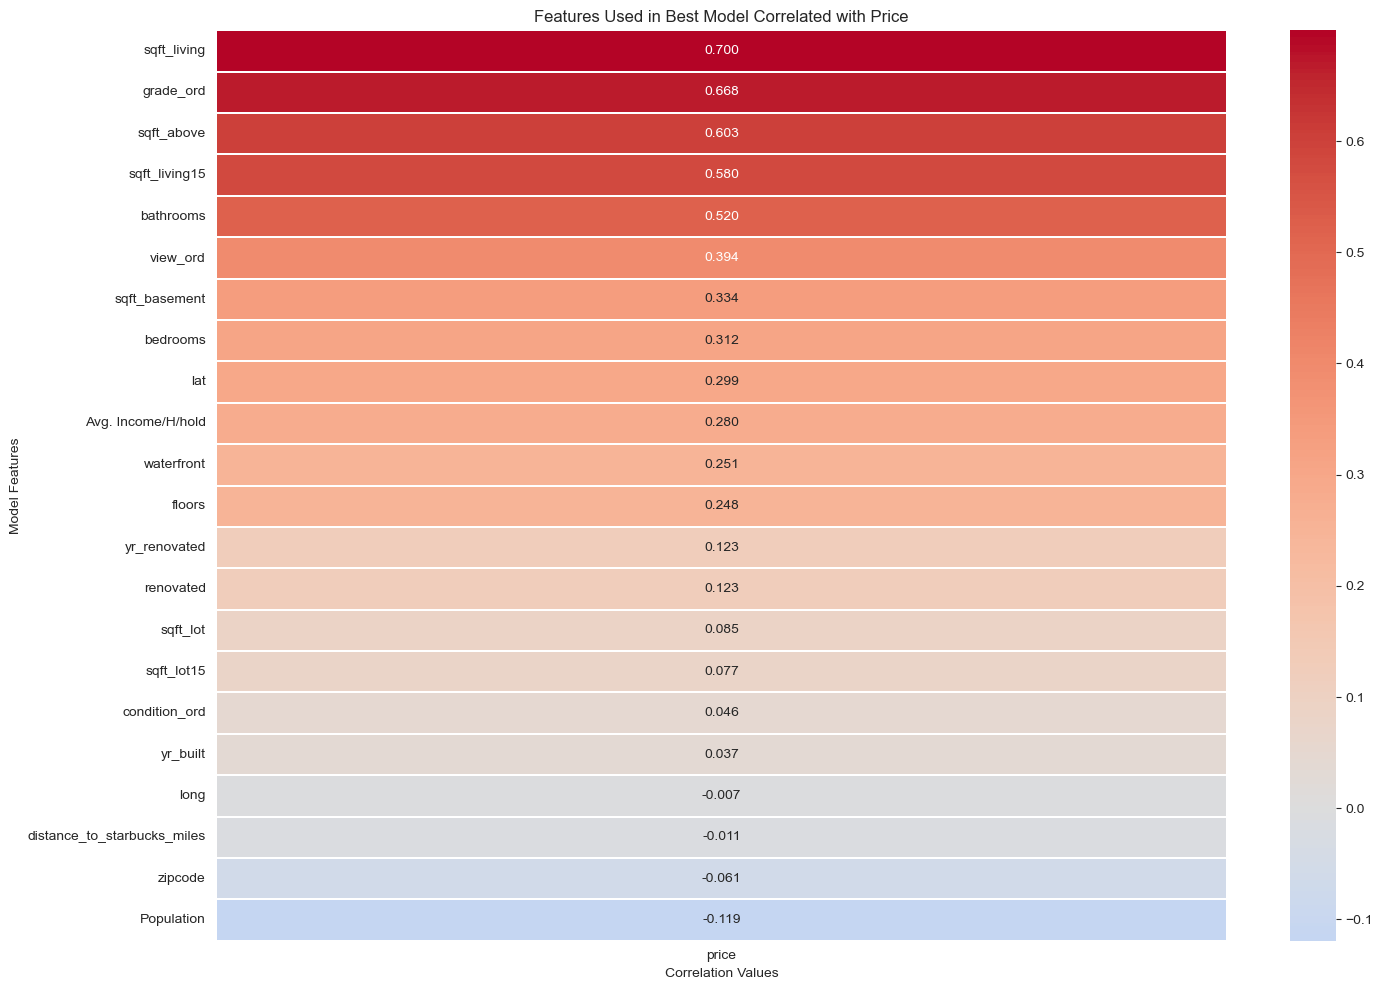

In [18]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(homes_and_income.drop(columns = ["id", "age", "distance_to_amazon_miles", "distance_to_needle_miles", "National Rank"]).corr().iloc[0:1, 1:].T.sort_values(by = 'price', ascending= False), center = 0, cmap = "coolwarm", annot=True, linewidths=.25, fmt = ".03f", ax=ax)
ax.set_title('Features Used in Best Model Correlated with Price')
ax.set_ylabel('Model Features')
ax.set_xlabel('Correlation Values')
plt.tight_layout()


In [19]:
dummy_zip = pd.get_dummies(homes_and_income['zipcode'], drop_first = True)

In [20]:
dummy_zip

,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
features = homes_and_income[['bedrooms', 'bathrooms', 'sqft_living',
                 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'lat', 'long',
                 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'view_ord', 'condition_ord', 'grade_ord', 
                 'age', "renovated", "distance_to_amazon_miles", 'Population', 'Avg. Income/H/hold', 'National Rank']]

In [22]:
features = features.join(dummy_zip)

In [23]:
features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,lat,long,sqft_basement,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3,1.00,1180,5650,1.0,0,1180,47.5112,-122.257,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1.00,880,6780,1.0,0,880,47.5009,-122.248,0,...,0,0,0,0,0,0,1,0,0,0
2,3,2.25,2100,8201,1.0,0,1620,47.5091,-122.244,480,...,0,0,0,0,0,0,1,0,0,0
3,3,1.00,1300,5898,1.0,0,1300,47.5053,-122.255,0,...,0,0,0,0,0,0,1,0,0,0
4,2,1.00,860,5265,1.0,0,860,47.5048,-122.272,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,4,3.25,3990,18115,2.0,0,3990,47.6177,-122.229,0,...,0,0,0,0,0,0,0,0,0,0
20339,4,3.50,4065,18713,2.0,0,4065,47.6209,-122.237,0,...,0,0,0,0,0,0,0,0,0,0
20340,5,5.25,3410,8118,2.0,0,3410,47.6295,-122.236,0,...,0,0,0,0,0,0,0,0,0,0
20341,5,4.00,5190,14600,2.0,0,5190,47.6102,-122.225,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X, y = features, homes_and_income[['price']]

# Generate train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42
)


# Init, fit, score
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

print(f"Training score: {multi_model.score(X_train, y_train)}")
multi_model_score = multi_model.score(X_test, y_test)
print(f"Test score: {multi_model.score(X_test, y_test)}")

Training score: 0.8034708611768964
Test score: 0.8098226817203398


C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [25]:
def correlated_column_names(df, target, threshold):
    # this function returns the a list of the names of columns with greater than a certain threshold of correlation. 
    index_columns = df.corr()[target][(df.corr()[target] >= threshold) & (df.corr()[target] != 1) ].index # this gets an index object
    columns = [index for index in index_columns] # this creates a list with column names 
    return(columns)


features = homes_and_income[correlated_column_names(homes_and_income, 'price', .1 )]
features.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15',
       'renovated', 'view_ord', 'grade_ord', 'Avg. Income/H/hold'],
      dtype='object')

In [26]:
features = features.join(dummy_zip)

In [27]:
features

,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3,1.00,1180,1.0,0,1180,0,0,47.5112,1340,...,0,0,0,0,0,0,1,0,0,0
1,2,1.00,880,1.0,0,880,0,0,47.5009,1190,...,0,0,0,0,0,0,1,0,0,0
2,3,2.25,2100,1.0,0,1620,480,0,47.5091,2660,...,0,0,0,0,0,0,1,0,0,0
3,3,1.00,1300,1.0,0,1300,0,0,47.5053,1320,...,0,0,0,0,0,0,1,0,0,0
4,2,1.00,860,1.0,0,860,0,0,47.5048,1650,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,4,3.25,3990,2.0,0,3990,0,0,47.6177,3450,...,0,0,0,0,0,0,0,0,0,0
20339,4,3.50,4065,2.0,0,4065,0,0,47.6209,3070,...,0,0,0,0,0,0,0,0,0,0
20340,5,5.25,3410,2.0,0,3410,0,0,47.6295,3410,...,0,0,0,0,0,0,0,0,0,0
20341,5,4.00,5190,2.0,0,5190,0,0,47.6102,3840,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X, y = features, homes_and_income[['price']]

# Generate train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42
)


# Init, fit, score
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

print(f"Training score: {multi_model.score(X_train, y_train)}")
multi_model_score = multi_model.score(X_test, y_test)
print(f"Test score: {multi_model.score(X_test, y_test)}")

Training score: 0.7996814534053419
Test score: 0.8045094741527161


C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [29]:
df = homes_and_income.groupby('zipcode')['price', 'Avg. Income/H/hold'].mean()

C:\Users\pedro\AppData\Local\Temp\ipykernel_7256\3564303108.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = homes_and_income.groupby('zipcode')['price', 'Avg. Income/H/hold'].mean()


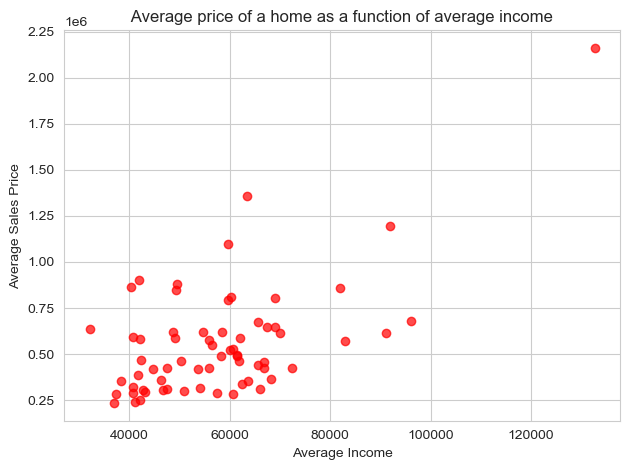

In [30]:
# plot fit

plt.scatter(df['Avg. Income/H/hold'], df.price, alpha=0.7, color= "red")
plt.title(" Average price of a home as a function of average income ")
plt.xlabel("Average Income")
plt.ylabel("Average Sales Price")
plt.tight_layout()
plt.show()

In [31]:
homes_and_income

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,age,point,distance_to_starbucks_miles,distance_to_amazon_miles,distance_to_needle_miles,Location,City,Population,Avg. Income/H/hold,National Rank
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,1180,...,60,"(47.5112, -122.257)",6.041009,8.552873,8.697321,"(47.83837, 121.766185)","Seattle, Washington",21860,47461,6983
1,4060000240,2014-06-23,205425,2,1.00,880,6780,1.0,0,880,...,70,"(47.6824, -122.347)",7.042714,4.157660,4.277786,"(47.83837, 121.766185)","Seattle, Washington",21860,47461,6983
2,4058801670,2014-07-17,445000,3,2.25,2100,8201,1.0,0,1620,...,48,"(47.6141, -122.212)",6.202388,5.856338,6.428772,"(47.83837, 121.766185)","Seattle, Washington",21860,47461,6983
3,2976800796,2014-09-25,236000,3,1.00,1300,5898,1.0,0,1300,...,54,"(47.3271, -122.323)",17.533820,20.425876,20.306674,"(47.83837, 121.766185)","Seattle, Washington",21860,47461,6983
4,6874200960,2015-02-27,170000,2,1.00,860,5265,1.0,0,860,...,84,"(47.3954, -122.206)",14.164142,16.848088,16.935911,"(47.83837, 121.766185)","Seattle, Washington",21860,47461,6983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,2525049086,2014-10-03,2720000,4,3.25,3990,18115,2.0,0,3990,...,26,"(47.6869, -122.187)",10.083756,8.281051,8.856670,"(47.62603, 122.233707)","Medina, Washington",3050,132665,46
20339,2525049113,2014-07-25,1950000,4,3.50,4065,18713,2.0,0,4065,...,28,"(47.3724, -122.277)",14.651190,17.511098,17.470900,"(47.62603, 122.233707)","Medina, Washington",3050,132665,46
20340,3262300485,2015-04-21,2250000,5,5.25,3410,8118,2.0,0,3410,...,9,"(47.5323, -122.071)",12.803219,13.901654,14.366287,"(47.62603, 122.233707)","Medina, Washington",3050,132665,46
20341,6447300365,2014-11-13,2900000,5,4.00,5190,14600,2.0,0,5190,...,2,"(47.5298, -121.879)",21.625747,22.338746,22.861709,"(47.62603, 122.233707)","Medina, Washington",3050,132665,46


In [32]:
homes_and_income.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'view_ord', 'condition_ord', 'grade_ord',
       'age', 'point', 'distance_to_starbucks_miles',
       'distance_to_amazon_miles', 'distance_to_needle_miles', 'Location',
       'City', 'Population', 'Avg. Income/H/hold', 'National Rank'],
      dtype='object')

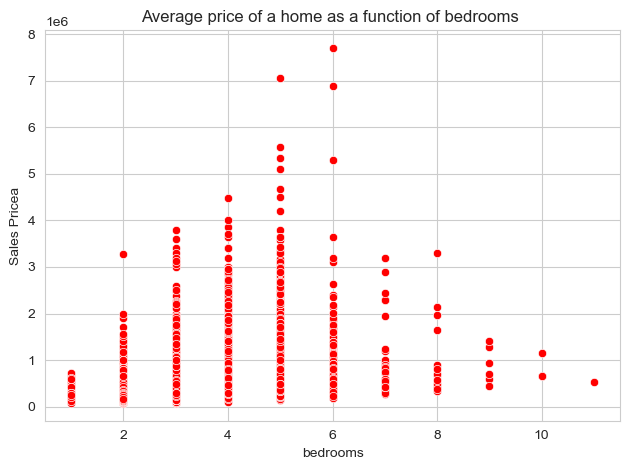

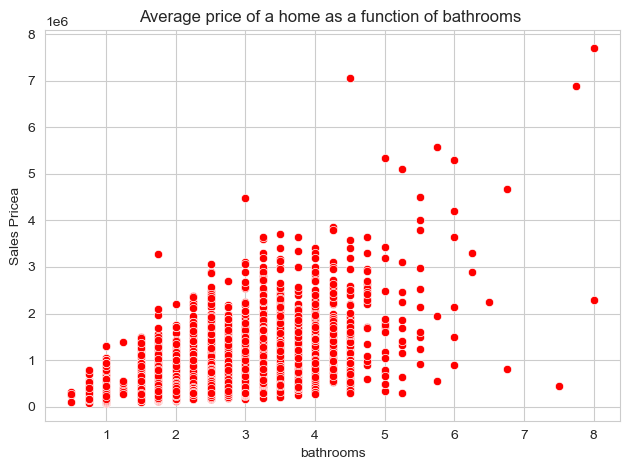

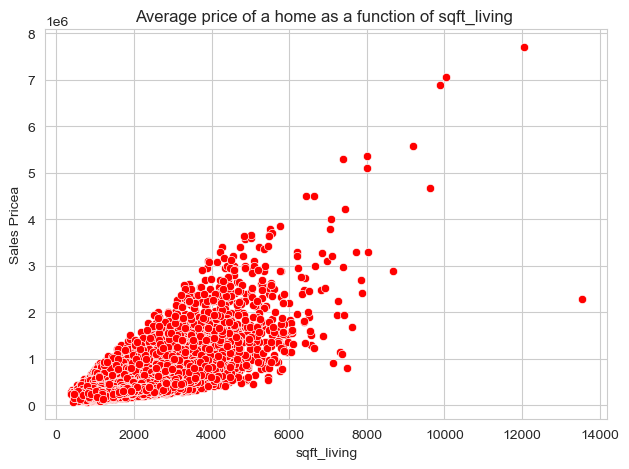

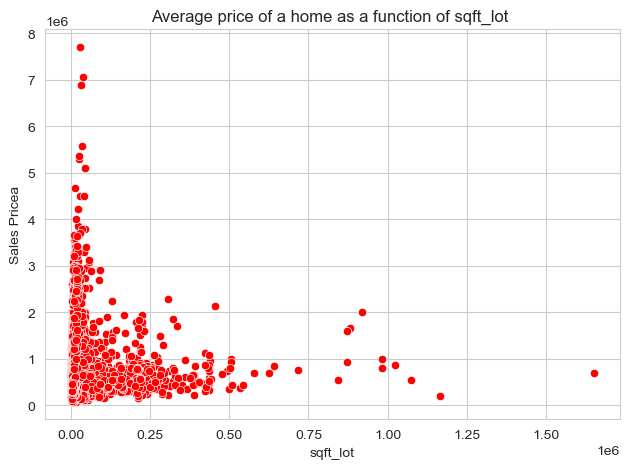

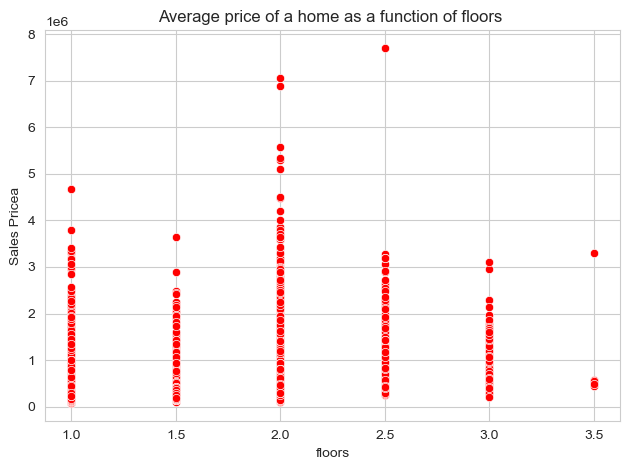

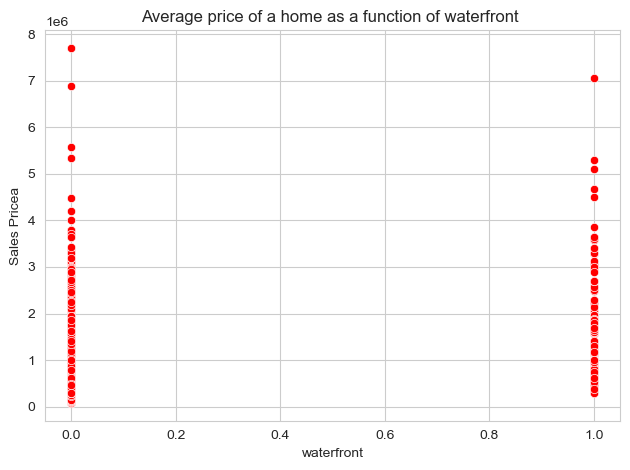

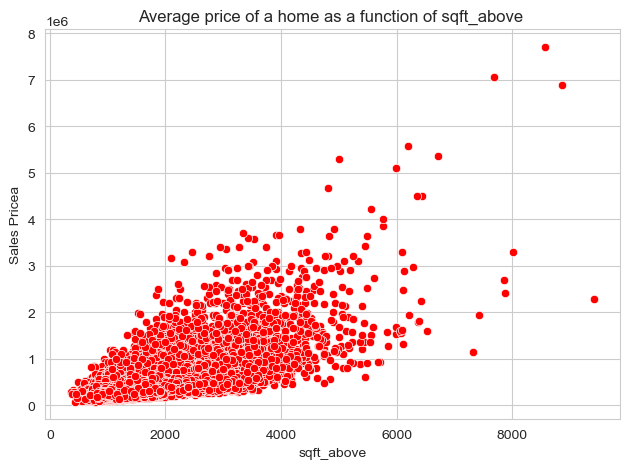

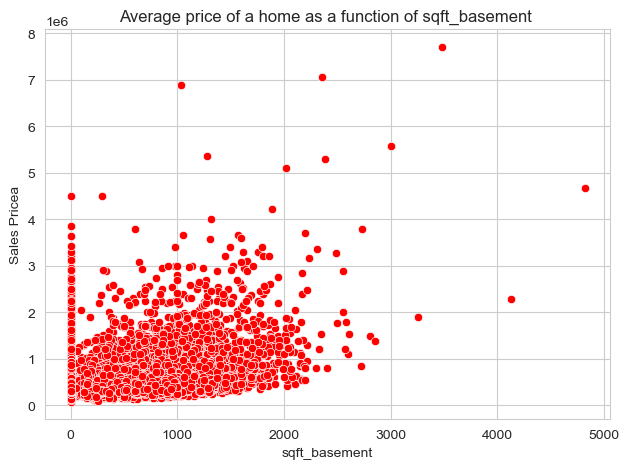

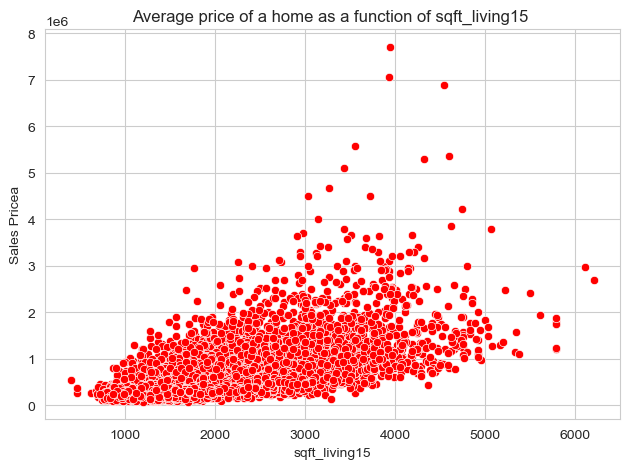

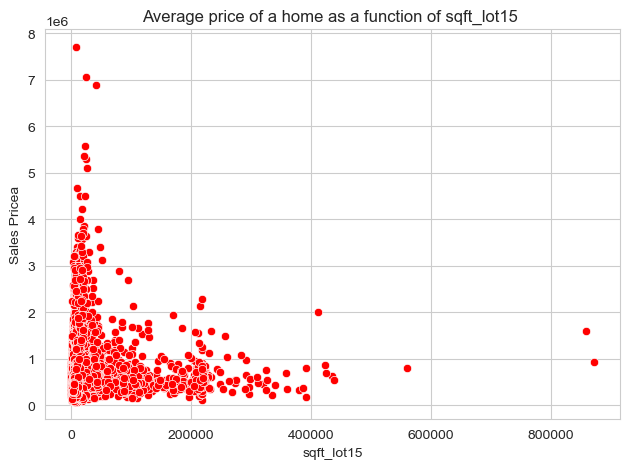

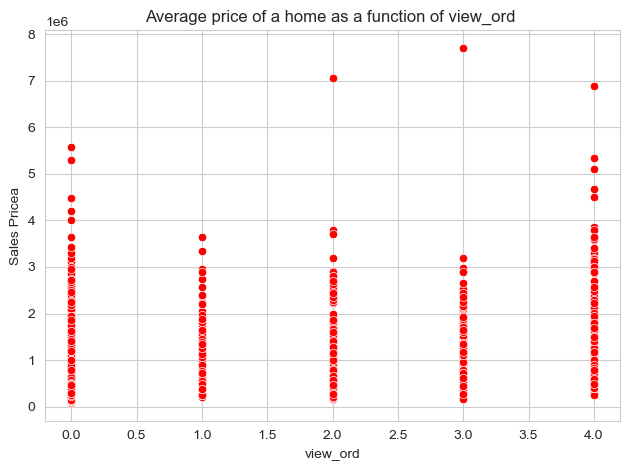

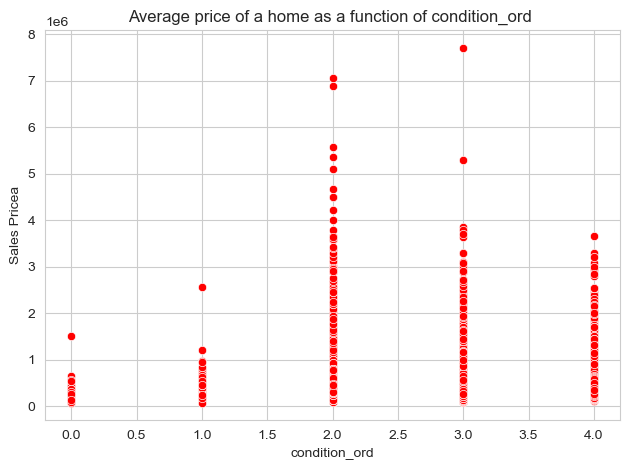

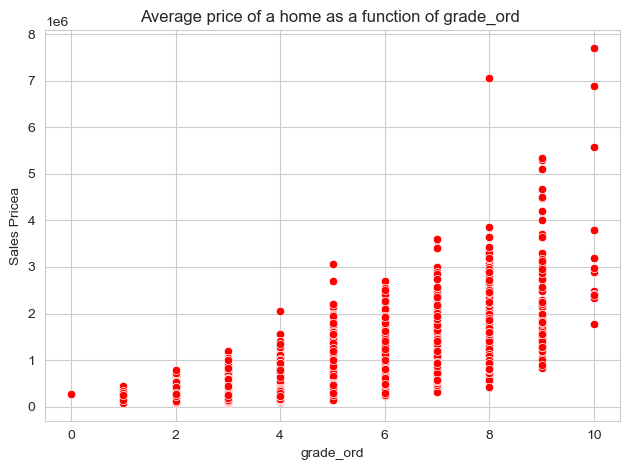

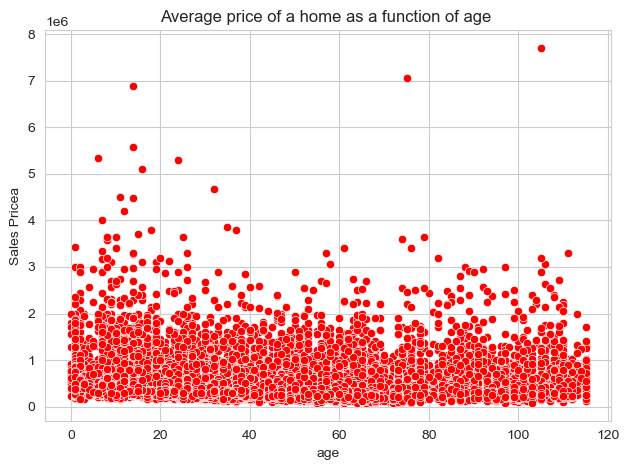

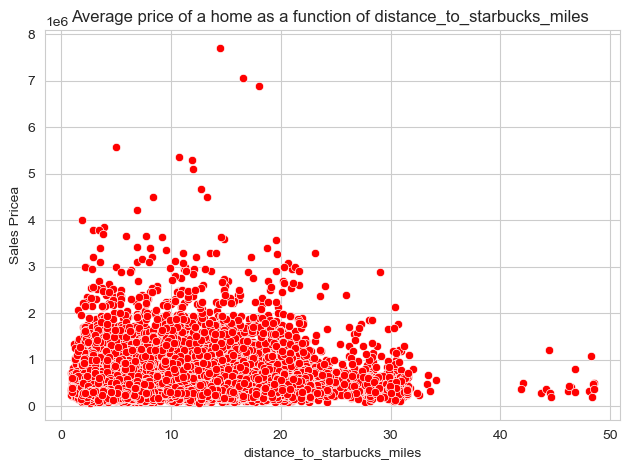

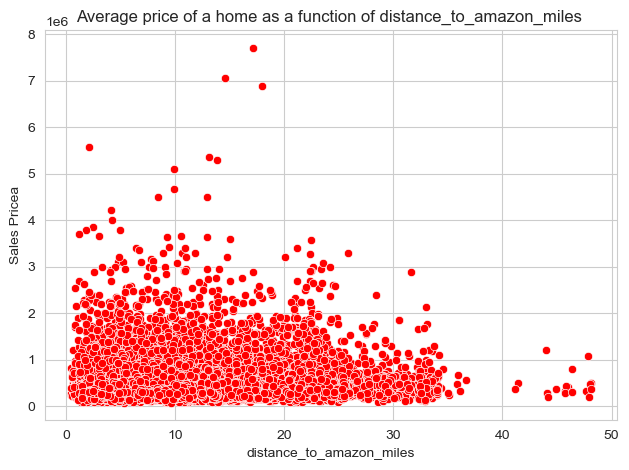

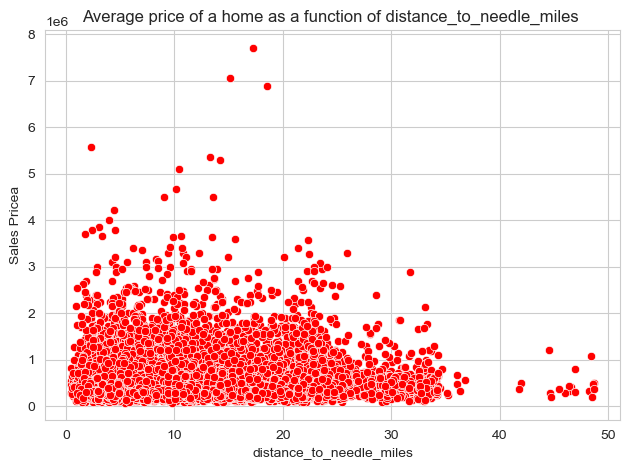

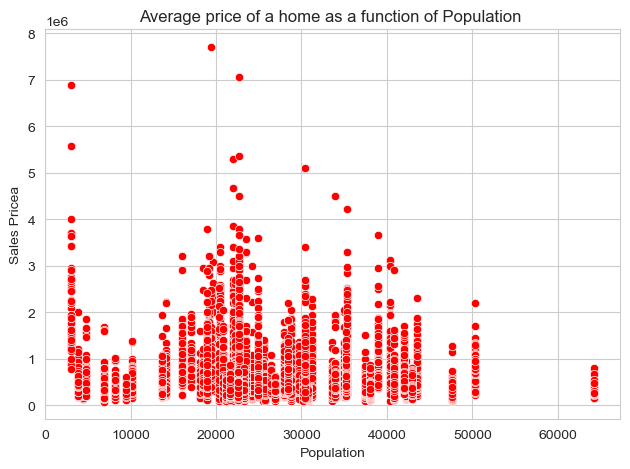

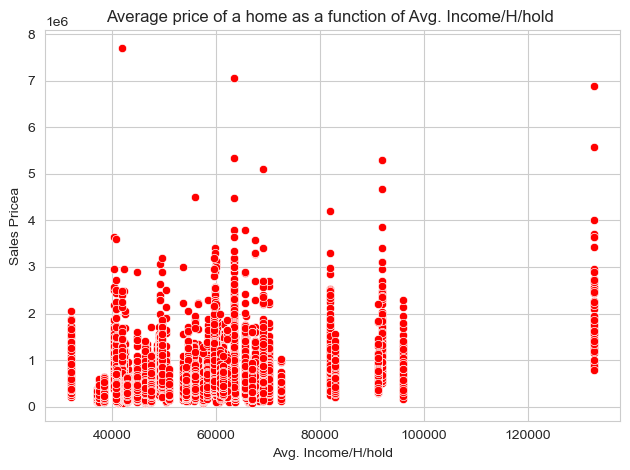

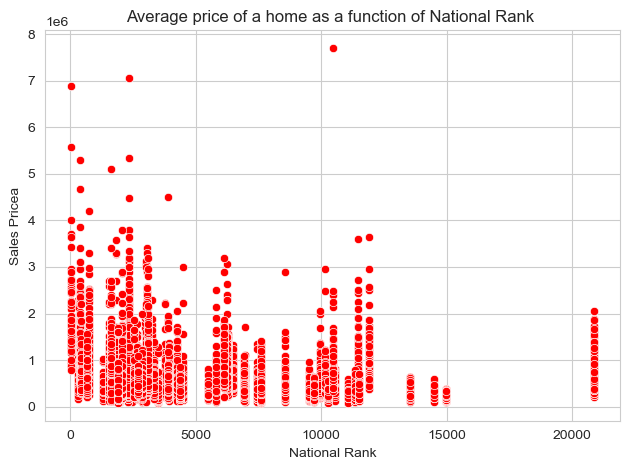

In [33]:
for col in ['bedrooms', 'bathrooms', 'sqft_living',
'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'sqft_living15',
'sqft_lot15', 'view_ord', 'condition_ord', 'grade_ord',
'age', 'distance_to_starbucks_miles',
'distance_to_amazon_miles', 'distance_to_needle_miles', 'Population', 'Avg. Income/H/hold', 'National Rank']:
    sns.scatterplot(data=homes_and_income, x = col,  y="price", color = "red" )
    plt.title(f"Average price of a home as a function of {col} ")
    plt.xlabel(f"{col}")
    plt.ylabel(f"Sales Pricea")
    plt.tight_layout()
    plt.show()

# Now its time to do the dependencies of our new dataset

In [34]:
#list(homes_and_income.loc[homes_and_income.price > 5000000].index.values)
homes_and_income.drop(index = list(homes_and_income.loc[homes_and_income.price > 5000000].index.values), inplace = True)

In [35]:
#homes_and_income.to_excel("sale_price_and_income.xlsx")

In [36]:
y = homes_and_income['price']
X = homes_and_income[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15',
       'renovated', 'view_ord', 'grade_ord', 'Avg. Income/H/hold']]


linear_with_interaction = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

X_transformed = linear_with_interaction.fit_transform(X)

feat_names = pd.Series(linear_with_interaction.get_feature_names())

feat_names

C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0           x0
1           x1
2           x2
3           x3
4           x4
        ...   
100    x10 x12
101    x10 x13
102    x11 x12
103    x11 x13
104    x12 x13
Length: 105, dtype: object

In [37]:
xs = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',  'x11', 'x12', 'x13']

columns = X.columns

map_dict = {x:y for x,y in zip(xs, columns)}

for key, value in map_dict.items():
    feat_names = feat_names.str.replace(key, value)


income_trans = pd.DataFrame(X_transformed)

income_trans.columns = feat_names

income_trans = income_trans.join(dummy_zip)

In [38]:
# Generate train/test sets

X_train, X_test, y_train, y_test = train_test_split(
    income_trans, np.log(y), test_size=.3, random_state=42
)


# Init, fit, score
interactions_model = LinearRegression()
interactions_model.fit(X_train, y_train)

print(f"Training score: {interactions_model.score(X_train, y_train)}")

print(f"Testing score: {interactions_model.score(X_test, y_test)}")

interactions_model_score  = interactions_model.score(X_test, y_test)

C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Training score: 0.8757780410471916
Testing score: 0.8692038438093413


C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# Now its time to visualize our result!

In [ ]:
X = income_trans
y = np.log(homes_and_income['price'])
y_pred = interactions_model.predict(income_trans)

fig = px.scatter(x=np.exp(y), y=np.exp(y_pred), labels={'x': 'True Sales Price', 'y': 'Predicted Sales Price'}, title = f"Predict Home Sale Price in King County with {len(income_trans.columns)}: R^2 = {interactions_model_score:.05f}")

fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=np.exp(y.min()), y0=np.exp(y.min()),
    x1=np.exp(y.max()), y1= np.exp(y.max())
)


import dash
import json
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Output, Input

cache = "fig.json"
# Construct a figure object and save it as json.

with open(cache, 'w') as f:
    f.write(fig.to_json())

# Create example app.
app = dash.Dash(prevent_initial_callbacks=True)
app.layout = html.Div([dcc.Graph(id="graph"), html.Button("Click me", id="btn")])


@app.callback(Output("graph", "figure"), [Input("btn", "n_clicks")])
def func(n_clicks):
    with open(cache, 'r') as f:
        return json.load(f)


if __name__ == '__main__':
    app.run_server()

fig.show()



C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Sep/2022 10:32:17] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Sep/2022 10:32:17] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [16/Sep/2022 10:32:17] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [16/Sep/2022 10:32:17] "GET /_favicon.ico?v=2.6.1 HTTP/1.1" 200 -
127.0.0.1 - - [16/Sep/2022 10:32:17] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [16/Sep/2022 10:32:17] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [16/Sep/2022 10:32:22] "POST /_dash-update-component HTTP/1.1" 200 -


In [ ]:
# colors = ['Positive' if c > 0 else 'Negative' for c in interactions_model.coef_]
#
# fig = px.bar(
#     x=income_trans.columns, y=interactions_model.coef_, color=colors,
#     color_discrete_sequence=['red', 'blue'],
#     labels=dict(x='Feature', y='Linear coefficient'),
#     title='Weight of each feature for predicting petal width'
# )
# fig.show()

# Splitting our Data to see how budget tier effects our R^2 Score

In [ ]:
low = homes_and_income.loc[homes_and_income.price <= 1000000]


high = homes_and_income.loc[(homes_and_income.price > 1000000) ]

In [ ]:
home_groups = [low, high]

In [ ]:
for tier in home_groups:
    y = tier['price']
    X = tier[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
                          'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15',
                          'renovated', 'view_ord', 'grade_ord', 'Avg. Income/H/hold']]


    linear_with_interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

    X_transformed = linear_with_interaction.fit_transform(X)

    feat_names = pd.Series(linear_with_interaction.get_feature_names())

    feat_names
    xs = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']

    columns = X.columns

    map_dict = {x: y for x, y in zip(xs, columns)}

    for key, value in map_dict.items():
        feat_names = feat_names.str.replace(key, value)

    income_trans = pd.DataFrame(X_transformed)

    income_trans.columns = feat_names

    income_trans = income_trans.join(dummy_zip)
    # Generate train/test sets

    X_train, X_test, y_train, y_test = train_test_split(
        income_trans, y, test_size=.3, random_state=42
    )

    # Init, fit, score
    interactions_model = LinearRegression()
    interactions_model.fit(X_train, y_train)

    print(f"Training score: {interactions_model.score(X_train, y_train)}")

    print(f"Testing score: {interactions_model.score(X_test, y_test)}")

    interactions_model_score = interactions_model.score(X_test, y_test)
    # Now its time to visualize our beautiful result!

    X = income_trans
    y = tier['price']
    y_pred = interactions_model.predict(income_trans)

    fig = px.scatter(x=y, y=y_pred, labels={'x': 'ground truth', 'y': 'prediction'},
                     title=f"Multi-Regression Model to Predict Home Sale Price in King County: R^2 = {interactions_model_score:.05f}")
    fig.add_shape(
        type="line", line=dict(dash='dash'),
        x0=y.min(), y0=y.min(),
        x1=y.max(), y1=y.max()
    )

    fig.show()

# Lets diverge from improving our model to imporving our sales pitch

In [ ]:
golden_zip = homes_and_income.loc[homes_and_income.zipcode == 98028]

In [ ]:
golden_zip.info()

In [ ]:
golden_zip.price.plot(kind = "hist")

In [ ]:
#golden_zip.to_excel("golden_zip_code.xlsx")